In [1]:
import pandas as pd
import numpy as np

# Data Manipulation

In [59]:
df = pd.read_csv('marketing_campaign.csv')

### Reading the Data

In [60]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [61]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [63]:
for i in df.columns:
    k=df[i].nunique()
    n = df[i].isna().sum()
    print(f'{i} : {k} , {n}')

ID : 2240 , 0
Year_Birth : 59 , 0
Education : 5 , 0
Marital_Status : 8 , 0
Income : 1974 , 24
Kidhome : 3 , 0
Teenhome : 3 , 0
Dt_Customer : 663 , 0
Recency : 100 , 0
MntWines : 776 , 0
MntFruits : 158 , 0
MntMeatProducts : 558 , 0
MntFishProducts : 182 , 0
MntSweetProducts : 177 , 0
MntGoldProds : 213 , 0
NumDealsPurchases : 15 , 0
NumWebPurchases : 15 , 0
NumCatalogPurchases : 14 , 0
NumStorePurchases : 14 , 0
NumWebVisitsMonth : 16 , 0
AcceptedCmp3 : 2 , 0
AcceptedCmp4 : 2 , 0
AcceptedCmp5 : 2 , 0
AcceptedCmp1 : 2 , 0
AcceptedCmp2 : 2 , 0
Complain : 2 , 0
Z_CostContact : 1 , 0
Z_Revenue : 1 , 0
Response : 2 , 0


In [64]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = df['Dt_Customer'].astype('int64')

In [65]:
avgInc = df['Income'].mean()
df['Income'].fillna(avgInc, inplace=True)

In [66]:
df['Teenhome'] = df['Teenhome'].map(lambda x : True if (x >= 1) else False)

In [67]:
from collections import Counter
Counter(df['Teenhome'])

Counter({False: 1158, True: 1082})

## Data preprocesing

In [68]:
X= df.drop(['Teenhome'], axis=1)
y= df['Teenhome']

##A#dding series encoding for education and delting ID

In [69]:
X['Education'] = X['Education'].map(lambda x: 1 if x=='Basic' else (2 if x=="Graduation" else (3 if x=="2n Cycle" else( 4 if x=="Master" else 5)) ) )

In [70]:
X['Education'].unique()

array([2, 5, 4, 1, 3])

In [71]:
X.drop(['ID'], axis=1, inplace=True)

Splitting the Numercal and categorical data for standardization and 1-hot encoding 

In [72]:
X_numerical = X.drop(['Marital_Status'],axis=1)

In [73]:
X_numerical.columns

Index(['Year_Birth', 'Education', 'Income', 'Kidhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [74]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_numerical)
X_num_scaled.shape #zero mean unit variance standardization

(2240, 26)

In [75]:
X_num_sc=pd.DataFrame(X_num_scaled,columns=list(X_numerical.columns))

In [76]:
X_num_sc.head()

,Year_Birth,Education,Income,Kidhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0.621359,0.25,0.084832,0.0,0.086548,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.592233,0.25,0.067095,0.5,0.882408,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.699029,0.25,0.105097,0.0,0.555974,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.883495,0.25,0.037471,0.5,0.938852,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.854369,1.00,0.085065,0.5,0.698024,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
X_scaled = pd.concat([X_num_sc,X[['Marital_Status']]],axis=1)

In [121]:
X_scaled.shape

(2240, 27)

In [123]:
n=0
for i in X_scaled['Marital_Status']:
    if i in ['Single','Divorced', 'Widow', 'Alone','Absurd', 'YOLO']:
        X_scaled['Marital_Status'][n]=0
    else:
        X_scaled['Marital_Status'][n]=1
    n=n+1
print(n)
        

/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2240


In [127]:
X_scaled['Marital_Status'] = X_scaled['Marital_Status'].astype(int)

In [129]:
X_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   float64
 1   Education            2240 non-null   float64
 2   Income               2240 non-null   float64
 3   Kidhome              2240 non-null   float64
 4   Dt_Customer          2240 non-null   float64
 5   Recency              2240 non-null   float64
 6   MntWines             2240 non-null   float64
 7   MntFruits            2240 non-null   float64
 8   MntMeatProducts      2240 non-null   float64
 9   MntFishProducts      2240 non-null   float64
 10  MntSweetProducts     2240 non-null   float64
 11  MntGoldProds         2240 non-null   float64
 12  NumDealsPurchases    2240 non-null   float64
 13  NumWebPurchases      2240 non-null   float64
 14  NumCatalogPurchases  2240 non-null   float64
 15  NumStorePurchases    2240 non-null   f

In [81]:
# X_scaled_enc=X_scaled #made another variable just to preserve the above one
# for i in ['Marital_Status']:
#     dummies = pd.get_dummies(X_scaled[i]) #1-hot encoding
#     dummies.columns=str(i)+'_'+dummies.columns 
#     X_scaled_enc = pd.concat([X_scaled_enc,dummies],axis=1)
#     X_scaled_enc.drop(i,inplace=True,axis=1)
    


### Checking correlation for feature selection

In [130]:

X_train =X_scaled
y_train =y

In [131]:
X_train.shape

(2240, 27)

In [98]:
X_corr = X_train

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

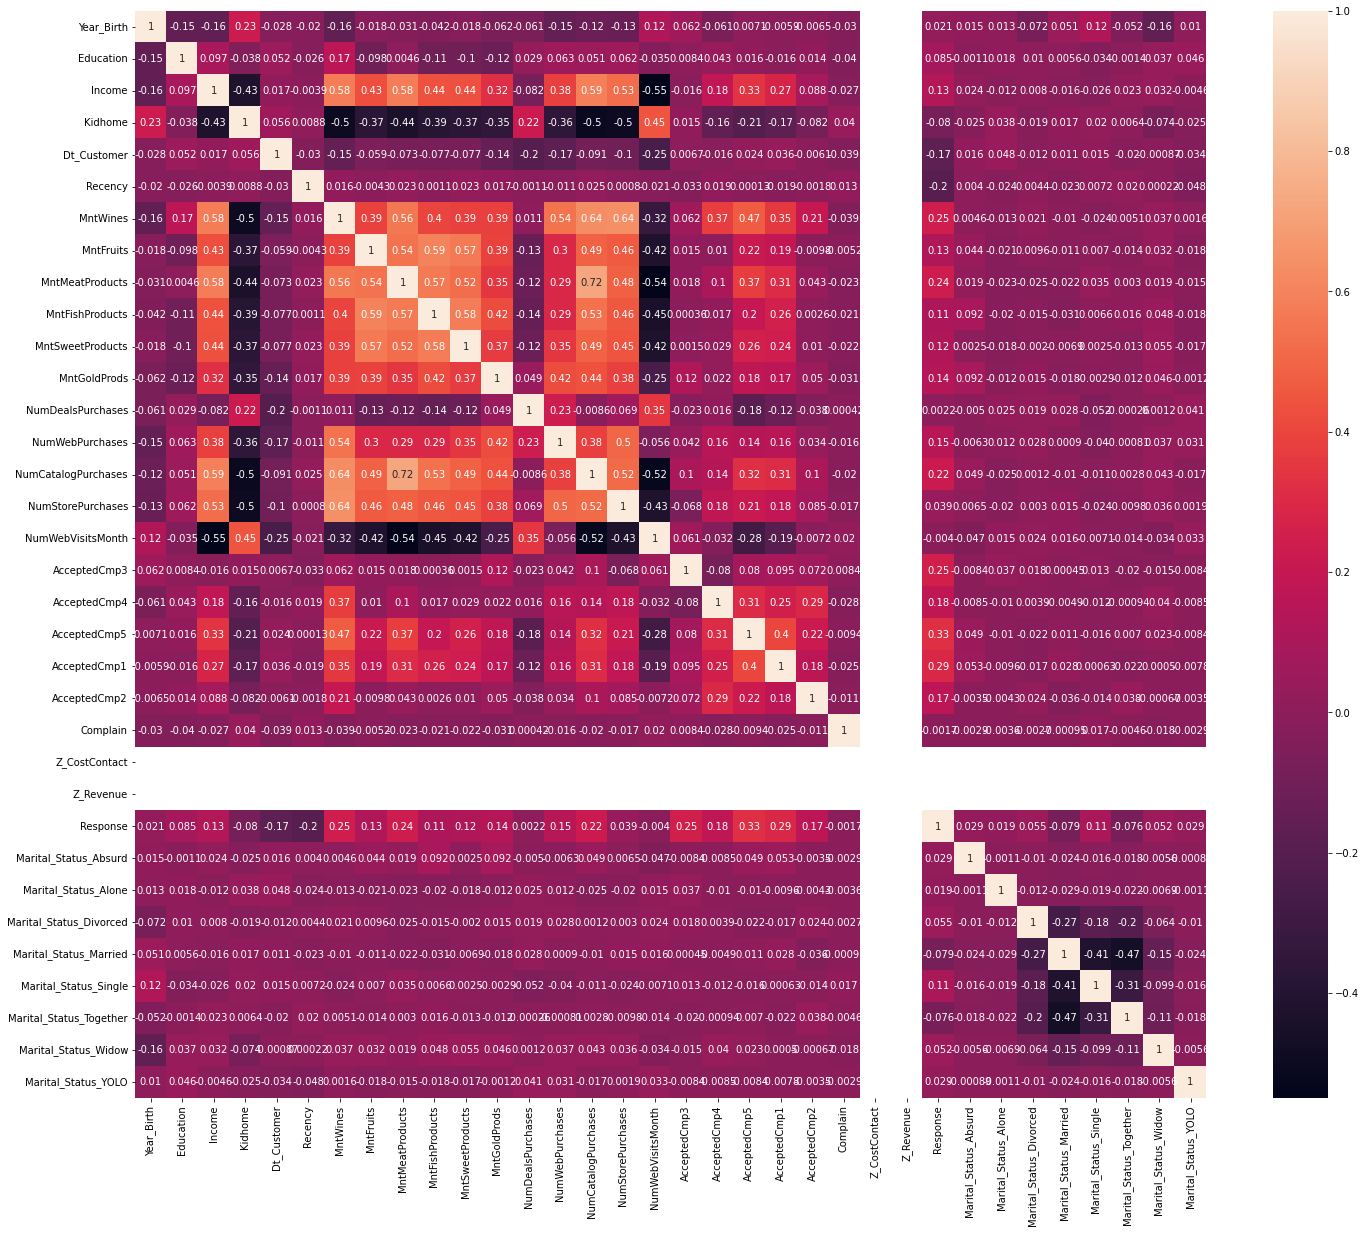

In [100]:
plt.figure(figsize=(24,20))
cor=X_corr.corr()
sns.heatmap(cor, annot=True)
plt.show()

### Feature Selection

## chi2 to find the best features

In [132]:
from sklearn.feature_selection import mutual_info_classif
# # determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info 

array([0.16948122, 0.0202319 , 0.17551756, 0.        , 0.03008446,
       0.01500074, 0.07238591, 0.04069979, 0.10583344, 0.0489788 ,
       0.04495381, 0.03463554, 0.13328472, 0.02676186, 0.04042338,
       0.01354814, 0.06436346, 0.        , 0.01757922, 0.03488295,
       0.00410808, 0.        , 0.        , 0.        , 0.        ,
       0.02790785, 0.00413356])

In [133]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Income                 0.175518
Year_Birth             0.169481
NumDealsPurchases      0.133285
MntMeatProducts        0.105833
MntWines               0.072386
NumWebVisitsMonth      0.064363
MntFishProducts        0.048979
MntSweetProducts       0.044954
MntFruits              0.040700
NumCatalogPurchases    0.040423
AcceptedCmp5           0.034883
MntGoldProds           0.034636
Dt_Customer            0.030084
Response               0.027908
NumWebPurchases        0.026762
Education              0.020232
AcceptedCmp4           0.017579
Recency                0.015001
NumStorePurchases      0.013548
Marital_Status         0.004134
AcceptedCmp1           0.004108
AcceptedCmp3           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Kidhome                0.000000
Z_Revenue              0.000000
dtype: float64

In [140]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
sel_cols = SelectKBest(chi2, k=18)
sel_cols.fit(X_train, y_train)
topk = list(X_train.columns[sel_cols.get_support()])
topk

['Year_Birth',
 'Education',
 'Kidhome',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Marital_Status']

In [141]:
X_train =X_train[topk]
# X_test = X_test[topk]

In [153]:
##importing griddesarch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


## KNN-Classifier

In [223]:
from sklearn.neighbors import KNeighborsClassifier
grid_params = {
    'n_neighbors' : [19,22,30,33,40],
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=grid_params,n_jobs=-1,verbose=2,cv=10)
knn_grid.fit(X_train,y_train)
knn_best_para = knn_grid.best_params_
print(knn_best_para)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'metric': 'manhattan', 'n_neighbors': 33, 'weights': 'distance'}


In [224]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, f1_score
# K_fold_knn = cross_val_score(knn,X_train, y_train,scoring = make_scorer(f1_score, average='weighted'), cv=10)
knn = KNeighborsClassifier(**knn_best_para)
K_fold_knn = cross_val_score(knn,X_train, y_train, cv=10)
K_fold_knn.mean()

0.8419642857142857

## SVM-Classifier

In [210]:
from sklearn.svm import SVC

In [211]:
SVMmodel = SVC()
# from sklearn.model_selection import cross_val_score
K_fold_svm = cross_val_score(SVMmodel,X_train, y_train, cv=10)
K_fold_svm.mean()


0.83125

## Decision Tree

In [191]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tree_para,n_jobs=-1,verbose=2,cv=10)
dt_grid.fit(X_train,y_train)
dt_best_para = dt_grid.best_params_
print(dt_best_para)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 12}


In [225]:
dtree = DecisionTreeClassifier(**dt_best_para)
# from sklearn.model_selection import cross_val_score
K_fold_dtree = cross_val_score(dtree,X_train, y_train, cv=10)
K_fold_dtree.mean()


0.8571428571428571

## Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
    
}
rf_grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,n_jobs=-1,verbose=2,cv=10)
rf_grid.fit(X_train,y_train)
rf_best_para = rf_grid.best_params_
print(rf_best_para)

# rfc = RandomForestClassifier(n_estimators=100)
# from sklearn.model_selection import cross_val_score
# K_fold_rfc = cross_val_score(rfc,X_train, y_train, cv=10)
# K_fold_rfc.mean()


Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}


In [190]:
rfc = RandomForestClassifier(n_estimators=100)
K_fold_rfc = cross_val_score(rfc,X_train, y_train, cv=10)
K_fold_rfc.mean()


0.8892857142857142

## MLP

In [162]:
from sklearn.neural_network import MLPClassifier
parameters={ 'learning_rate': ["constant", "invscaling", "adaptive"], 'hidden_layer_sizes': [(100,1), (100,2), (100,3)], 'alpha': [0.01,0.1,0.2,0.02], 'activation': ["logistic", "relu", "Tanh"]}

mlp_grid = GridSearchCV(estimator=MLPClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=2)

mlp_grid.fit(X_train,y_train)

mlp_best_para = mlp_grid.best_params_
print(mlp_best_para)


Fitting 2 folds for each of 108 candidates, totalling 216 fits


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.775      0.62767857 0.646875   0.50357143 0.77589286 0.78258929
 0.78258929 0.67901786 0.78214286 0.64821429 0.625      0.51696429
 0.64866071 0.63169643 0.64955357 0.65       0.78348214 0.65089286
 0.51696429 0.5        0.63348214 0.51696429 0.62901786 0.51696429
 0.64375    0.51696429 0.64464286 0.77723214 0.5        0.63125
 0.68928571 0.78482143 0.65223214 0.78794643 0.78571429 0.78660714
 0.64910714 0.84375    0.84330357 0.85089286 0.85133929 0.83794643
 0.84821429 0.84866071 0.84419643 0.82633929 0.84553571 0.83571429
 0.83794643 0.81785714 0.67589286 0.84732143 0.84508929 0.83526786
 0.5        0.6875     0.66607143 0.84285714 0.84330357 0.84955357
 0.84330357 0.85089286 0.84910714 0.68839286 0.83883929 0.66964286
 0.64375    0.84196429 0.81875    0.84017857 0.85044643 0.84151786
        nan        nan      

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 2), 'learning_rate': 'invscaling'}


/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [161]:
mlp = MLPClassifier(**mlp_best_para)
K_fold_mlp = cross_val_score(mlp,X_train, y_train, cv=10)
K_fold_mlp.mean()

/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/ashish/Documents/UnfairMeans/UFM_env/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochasti

0.8325892857142858

## Gradient Booster

In [167]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
parameters = {#'nthread':[3,4], #when use hyperthread, xgboost may become slower
               "criterion": ["friedman_mse",  "mae"],
              "loss":["deviance","exponential"],
#               "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.05,0.1], #so called `eta` value
#               'max_depth': [3,4,5],
#               'min_samples_leaf': [4,5,6],

              'subsample': [0.6,0.7,0.8],
#               'n_estimators': [5,10,20],#number of trees, change it to 1000 for better results

              }
gb_grid = GridSearchCV(estimator=GradientBoostingClassifier(),param_grid=parameters,n_jobs=-1,verbose=2,cv=10)
gb_grid.fit(X_train,y_train)
gb_best_para = gb_grid.best_params_
print(gb_best_para)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'subsample': 0.6}


In [170]:
gb = GradientBoostingClassifier(**gb_best_para)
K_fold_gb = cross_val_score(gb,X_train, y_train, cv=10)
K_fold_gb.mean()

0.8839285714285714